In [2]:
using Random
using CSV
using Plots
using DataFrames
using Statistics
using LinearAlgebra

In [3]:
df = CSV.read("/Users/hamzah/Desktop/consolidated_players_dataset.csv")

# let's list all available categories, as well as their datatype using the "eltype" function.
feature_names = names(df)
for i in 1:length(feature_names)
    println(string(i), "\t", string(feature_names[i]), "\t\t\t", string(eltype(df[!, i])))
end

1	2018-19			Int64
2	2019-20			Int64
3	2020-21			Int64
4	2021-22			Int64
5	2022-23			Int64
6	2023-24			Int64
7	2P			Float64
8	2P%			Float64
9	2PA			Float64
10	3P			Float64
11	3PPercentage			Float64
12	3PA			Float64
13	AST			Float64
14	Age			Int64
15	BLK			Float64
16	DRB			Float64
17	FG			Float64
18	FGPercentage			Float64
19	FGA			Float64
20	FT			Float64
21	FTPercentage			Float64
22	FTA			Float64
23	G			Int64
24	GS			Int64
25	Guaranteed			Int64
26	MP			Float64
27	ORB			Float64
28	PF			Float64
29	PTS			Float64
30	Player			String
31	Pos			String
32	STL			Float64
33	Signed Using			Union{Missing, String}
34	TOV			Float64
35	TRB			Float64
36	eFGPercentage			Float64


In [4]:
df = df[shuffle(1:end), :] # we shuffle the data so that our train/test split will be truly random

train_proportion = 0.7
n = size(df, 1)
println("Size of dataset: ", string(n))



# Put the first ntrain observations in the DataFrame df into the training set, and the rest into the test set
ntrain = convert(Int, round(train_proportion*n))

target = df[:, :Guaranteed]
data = df[:, filter(col -> (col != :Guaranteed), feature_names)]


#Now we will split the data to create training, validation, and test sets. 

# the following variable records the features of examples in the training set
train_x = data[1:ntrain,:]
# the following variable records the features of examples in the test set
test_x = data[ntrain+1:end, :]
# the following variable records the labels of examples in the training set
train_y = target[1:ntrain,:]
# the following variable records the labels of examples in the test set
test_y = target[ntrain+1:end, :]

# let's take a look
train_x

Size of dataset: 415


,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,2P,2P%,2PA
,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Float64
1,15500000,15500000,15500000,0,0,0,6.3,0.48,13.2
2,5470920,6392760,8099627,0,0,0,3.8,0.43,8.8
3,1567007,1702486,0,0,0,0,2.72,0.57,4.79
4,1773840,2731714,0,0,0,0,0.7,0.47,1.5
5,32088932,34234964,36595996,38957028,0,0,5.61,0.48,11.59
6,5193600,5453280,0,0,0,0,2.6,0.5,5.2
7,10000000,0,0,0,0,0,3.2,0.51,6.3
8,2760095,0,0,0,0,0,1.6,0.59,2.7
9,1378242,0,0,0,0,0,0.5,0.71,0.7


In [5]:
# Adding more features: Point (PTS), Assists (AST), Rebounds (TRB), Blocks Per Game (BLK), Minutes per Game (MP), 
# Effective Field Goal Percentage (eFGPercentage), and Age
labels = [
  :AST,
  :PTS,
  :TRB,    
  :BLK, 
  :MP,
  :eFGPercentage,
  :Age  
]

7-element Array{Symbol,1}:
 :AST
 :PTS
 :TRB
 :BLK
 :MP
 :eFGPercentage
 :Age

In [6]:
# the following variable should have as many columns as the labels, and as many rows as examples in the training set      
train_vals = train_x[:,labels]
# the following variable should have as many columns as real variables, and as many rows as examples in the test set      
test_vals = test_x[:,labels]

,AST,PTS,TRB,BLK,MP,eFGPercentage,Age
,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,2.5,13.9,3.5,0.2,29.4,0.51,28
2,1.6,8.6,3.6,1.1,25.6,0.49,30
3,1.2,22.7,6.6,2.4,32.4,0.49,22
4,5.2,15.2,3.7,0.3,29.7,0.45,20
5,1.1,8.8,3.3,0.1,18.5,0.59,29
6,1.4,6.7,1.0,0.1,13.6,0.46,19
7,2.0,11.6,7.7,0.4,24.5,0.53,21
8,1.3,2.0,0.8,0.0,4.7,0.53,22
9,1.0,2.0,0.0,0.0,13.0,0.5,32


In [7]:
Xtrain = convert(Matrix,train_vals)
Xtest = convert(Matrix,test_vals)

125×7 Array{Float64,2}:
 2.5   13.9    3.5   0.2   29.4   0.51  28.0
 1.6    8.6    3.6   1.1   25.6   0.49  30.0
 1.2   22.7    6.6   2.4   32.4   0.49  22.0
 5.2   15.2    3.7   0.3   29.7   0.45  20.0
 1.1    8.8    3.3   0.1   18.5   0.59  29.0
 1.4    6.7    1.0   0.1   13.6   0.46  19.0
 2.0   11.6    7.7   0.4   24.5   0.53  21.0
 1.3    2.0    0.8   0.0    4.7   0.53  22.0
 1.0    2.0    0.0   0.0   13.0   0.5   32.0
 0.3    2.7    2.2   0.1   15.8   0.44  23.0
 1.3   16.2    5.8   0.6   32.1   0.48  33.0
 0.0    2.0    1.0   0.0    5.0   0.5   27.0
 2.2   18.0    2.5   0.4   31.2   0.54  29.0
 ⋮                                ⋮     
 1.9    9.3    1.6   0.1   19.8   0.52  23.0
 4.1   15.7    5.1   0.6   33.1   0.52  27.0
 4.5    8.8    2.7   0.4   23.3   0.49  23.0
 0.5    4.8    2.6   0.9    9.5   0.62  30.0
 2.7    9.5    2.5   0.0   22.4   0.58  24.0
 7.9   18.6    5.4   0.2   31.8   0.55  32.0
 0.6    4.8    3.0   0.7   16.7   0.47  20.0
 0.79   6.31   2.98  0.18  14.63  0

In [8]:
"""This function just computes the mean squared error."""
function MSE(y, pred)
    "Fill this in."
    MSE = mean((y - pred).^2)
end

"""This completed function plots the main diagonal; 
for a "predicted vs true" plot with perfect predictions,
all data lies on this line"""
function plotDiagonal(xmin, xmax)
    xsamples = [xmin, xmax]
    plot!(xsamples, xsamples, color=:black)
end

"""This completed helper funciton plots x vs, y and labels the axes."""
function plotdata(x,y,xname, yname; margin=.05, plotDiag=true, zeromin=false)
    scatter(x,y, label="data")
    xlabel!(xname)
    ylabel!(yname)
    range_y = maximum(y) - minimum(y)
    range_x = maximum(x) - minimum(x)
    if plotDiag
        plotDiagonal(minimum(x)-margin*range_x, maximum(x)+margin*range_x)
    end
    if zeromin
        ylims!((0.0,maximum(y)+margin*range_y))
        xlims!((0.0,maximum(x)+margin*range_x))
    else
        ylims!((minimum(y)-margin*range_y,maximum(y)+margin*range_y))
        xlims!((minimum(x)-margin*range_x,maximum(x)+margin*range_x))
    end
end

"""This completed function plots the predicted labels vs the actual labels
(We only plots the first 1000 points to avoid slow plots.)"""
function plot_pred_true(test_pred, test_y, max_points = 125)
    plotdata(test_pred[1:max_points], test_y[1:max_points], "Predicted (\$)", "True (\$)", zeromin=true)
end

plot_pred_true

In [94]:
# The weights of your linear equation (compute via least squares)
w = Xtrain\train_y

#Your prediction vectors
train_pred = Xtrain * w
test_pred = Xtest * w

#The mean squared error for your predictions.
train_MSE = MSE(train_y, train_pred)
test_MSE = MSE(test_y, test_pred)

7.495520134372845e14

Train MSE	4.218866808760726e14
Test MSE 	7.495520134372845e14


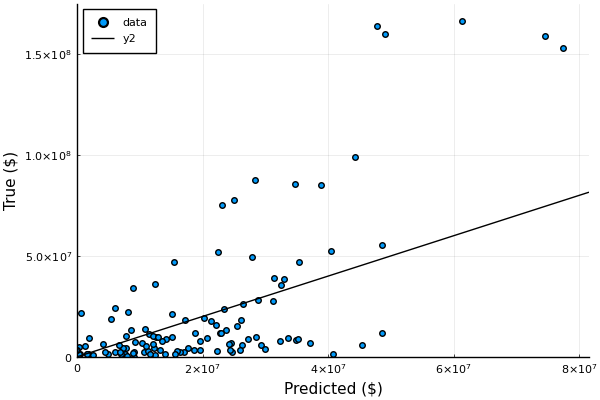

In [93]:
println("Train MSE\t", train_MSE)
println("Test MSE \t", test_MSE)

plot_pred_true(test_pred, test_y)

Fitting additional features to our linear model beyond just points, rebounds, and assists (including Blocks Per Game (BLK), Minutes per Game (MP), Effective Field Goal Percentage (eFGPercentage), and Age) substainally decreased our MSE for both the training and testing data sets.  

## Quantile Loss with L1 Regularizer

In [95]:
using DataFrames, Plots, LowRankModels, CSV
pyplot()


Plots.PyPlotBackend()

In [96]:
using Plots, Random, LinearAlgebra, Statistics, SparseArrays
# module ProximalGradient

using LowRankModels

import LowRankModels: evaluate, grad
evaluate(loss::Loss, X::Array{Float64,2}, w::Array{Float64,1}, y) = evaluate(loss, X*w, y)
grad(loss::Loss, X::Array{Float64,2}, w::Array{Float64,1}, y) = X'*grad(loss, X*w, y)
evaluate(loss::Loss, X::Array{Float64,2}, w::Array{Float64,2}, y) = evaluate(loss, X*w, y)
grad(loss::Loss, X::Array{Float64,2}, w::Array{Float64,2}, y) = X'*grad(loss, X*w, y)

export evaluate, grad, proxgrad

"""proximal gradient with a linesearch that falls back to a constant (smaller) stepsize
when no descent direction is found"""
function proxgrad(loss::Loss, reg::Regularizer, X::Array{Float64,2}, y;
                  maxiters = 100,
                  stepsize = 1,
                  c = .1, # sufficient decrease
                  max_inner_iters = 100, # if stepsize decreases 100 times, assume problem is actually nonsmooth
                  w = (embedding_dim(loss)==1 ? zeros(size(X,2)) : zeros(size(X,2), embedding_dim(loss))),
                  ch = ConvergenceHistory("proxgrad"))
    oldloss = evaluate(loss, X, w, y)
    update_ch!(ch, 0, oldloss + evaluate(reg, w))
    t = time()
    stepsize0 = copy(stepsize)
    for i=1:maxiters
        # gradient
        g = grad(loss, X, w, y)
        # prox gradient step
        grad_step = w - stepsize*g
        w_new = prox(reg, grad_step, stepsize)

        # linesearch 
        curloss = evaluate(loss, X, w_new, y) # record loss value
        inner_iters = 0 # just in case
        while curloss - oldloss >= -c*stepsize*dot(g, w_new - w) # gradient approximation is not good
            stepsize /= 2
            grad_step = w - stepsize*g
            w_new = prox(reg, grad_step, stepsize)
            curloss = evaluate(loss, X, w_new, y)
            inner_iters +=1
            if inner_iters > max_inner_iters # nonsmooth; fall back to constant stepsize
                return proxgrad_const(loss, reg, X, y, maxiters=maxiters, stepsize = stepsize0/10, w = w, ch = ch)
            end
        end
        # take the step
        copy!(w, w_new)
        oldloss = curloss
        #stepsize = copy(stepsize0)
        # record objective value and elapsed time
        t, told = time(), t
        update_ch!(ch, t - told, curloss + evaluate(reg, w))
    end
    return w
end

"""proximal gradient method with Armijo-Wolfe linesearch"""
function proxgrad_linesearch(loss::Loss, reg::Regularizer, X::Array{Float64,2}, y;
                  maxiters = 100,
                  stepsize = 1.,
                  c = .1, # sufficient decrease
                  w = (embedding_dim(loss)==1 ? zeros(size(X,2)) : zeros(size(X,2), embedding_dim(loss))),
                  ch = ConvergenceHistory("proxgrad"))
    oldloss = evaluate(loss, X, w, y)
    update_ch!(ch, 0, oldloss + evaluate(reg, w))
    t = time()
    for i=1:maxiters
        # gradient
        g = grad(loss, X, w, y)
        # prox gradient step
        grad_step = w - stepsize*g
        w_new = prox(reg, grad_step, stepsize)
        # record loss value
        curloss = evaluate(loss, X, w_new, y)
        while curloss - oldloss >= -c*stepsize*dot(g, w_new - w) # gradient approximation is not good
            stepsize /= 2
            grad_step = w - stepsize*g
            w_new = prox(reg, grad_step, stepsize)
            curloss = evaluate(loss, X, w_new, y)
        end
        # take the step
        copy!(w, w_new)
        oldloss = curloss
        # record objective value and elapsed time
        t, told = time(), t
        update_ch!(ch, t - told, curloss + evaluate(reg, w))
    end
    return w
end

"""proximal gradient method with decreasing stepsize"""
function proxgrad_dec(loss::Loss, reg::Regularizer, X::Array{Float64,2}, y;
                  maxiters = 100,
                  stepsize = 1.,
                  w = (embedding_dim(loss)==1 ? zeros(size(X,2)) : zeros(size(X,2), embedding_dim(loss))),
                  ch = ConvergenceHistory("proxgrad"),
                  verbose = true)
    wbest = copy(w)
    update_ch!(ch, 0, evaluate(loss, X, w, y) + evaluate(reg, w))
    t = time()
    if verbose
      println("using decreasing stepsize for nondifferentiable loss")
    end
    for i=1:maxiters
        # gradient
        g = grad(loss, X, w, y)
        # prox gradient step
        w = prox(reg, w - stepsize/i*g, stepsize/i)
        # record objective value
        obj = evaluate(loss, X, w, y) + evaluate(reg, w)
        if obj < ch.objective[end]
          if verbose
            println("found a better obj $obj")
          end
          copy!(wbest, w)
          update_ch!(ch, time() - t, obj)
        end
    end
    return wbest
end

"""proximal gradient method with constant stepsize"""
function proxgrad_const(loss::Loss, reg::Regularizer, X::Array{Float64,2}, y;
                  maxiters = 100,
                  stepsize = 1.,
                  w = (embedding_dim(loss)==1 ? zeros(size(X,2)) : zeros(size(X,2), embedding_dim(loss))),
                  ch = ConvergenceHistory("proxgrad"))
    wbest = copy(w)
    update_ch!(ch, 0, evaluate(loss, X, w, y) + evaluate(reg, w))
    t = time()
    for i=1:maxiters
        # gradient
        g = grad(loss, X, w, y)
        # prox gradient step
        w = prox(reg, w - stepsize*g, stepsize)
        # record objective value
        obj = evaluate(loss, X, w, y) + evaluate(reg, w)
        if obj < ch.objective[end]
          copy!(wbest, w)
          update_ch!(ch, time() - t, obj)
        end    end
    return wbest
end


# end

proxgrad_const

In [138]:
n = size(data,1)
X = [data[:PTS] data[:AST] data[:TRB] data[:BLK] data[:MP] data[:eFGPercentage] data[:Age] ones(n)]
y = data[:Guaranteed]
w=X\y


8-element Array{Float64,1}:
       2.8050744393557883e6
       3.721317703017893e6
       2.274868873013767e6
 -439117.7175688055
 -947825.5868124352
      -4.767588373302161e6
  116151.6407759263
      -5.283456130484165e6

In [139]:
PTS = Float64[]
AST = Float64[]
TRB = Float64[]
BLK = Float64[]
MP = Float64[]
eFGPercentage = Float64[]
Age = Float64[]
Intercept = Float64[]
w_new = 0

#for Q in quantiles
for i = 1:19
    
    w_new = proxgrad(QuantileLoss(quantile=0.05*i), OneReg(), X, y)
      push!(PTS, w_new[1]) 
      push!(AST, w_new[2])
      push!(TRB, w_new[3])
      push!(BLK, w_new[4])
      push!(MP, w_new[5])
      push!(eFGPercentage, w_new[6])
      push!(Age, w_new[7])
      push!(Intercept, w_new[8])
end

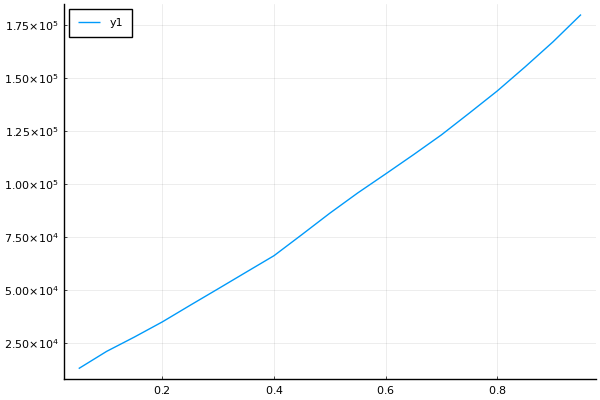

In [140]:
Quantile_Range = []

for i = 1:19
    j = 0.05*i
    push!(Quantile_Range,j)
end
Quantile_Range
plot(Quantile_Range, PTS)

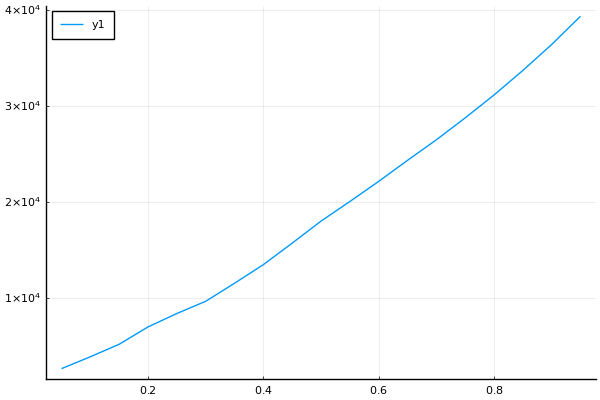

In [141]:
Quantile_Range = []

for i = 1:19
    j = 0.05*i
    push!(Quantile_Range,j)
end
Quantile_Range
plot(Quantile_Range, AST)

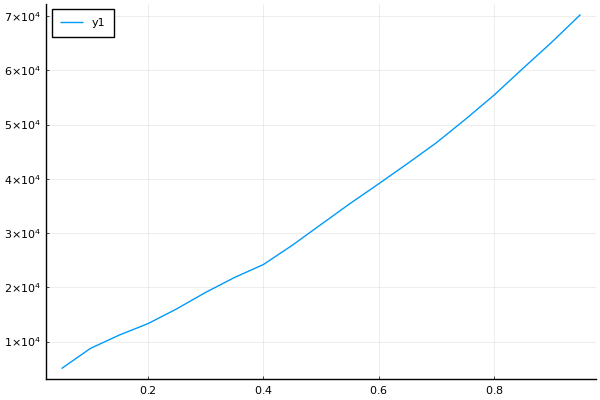

In [142]:
Quantile_Range = []

for i = 1:19
    j = 0.05*i
    push!(Quantile_Range,j)
end
Quantile_Range
plot(Quantile_Range, TRB)

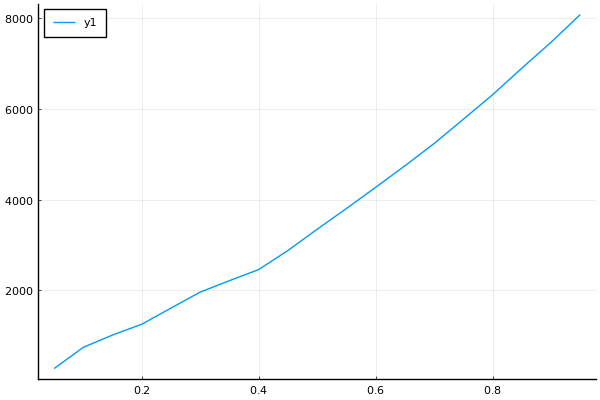

In [143]:
Quantile_Range = []

for i = 1:19
    j = 0.05*i
    push!(Quantile_Range,j)
end
Quantile_Range
plot(Quantile_Range, BLK)

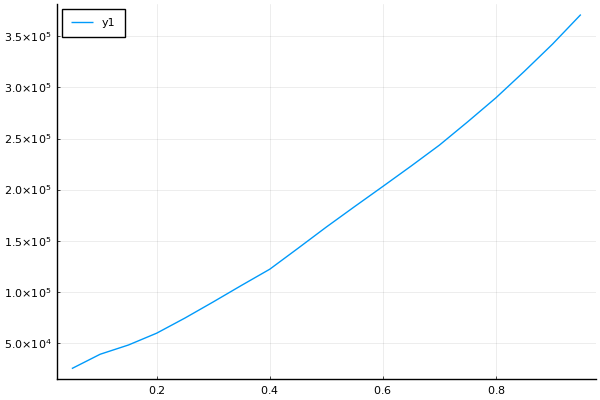

In [144]:
Quantile_Range = []

for i = 1:19
    j = 0.05*i
    push!(Quantile_Range,j)
end
Quantile_Range
plot(Quantile_Range, MP)

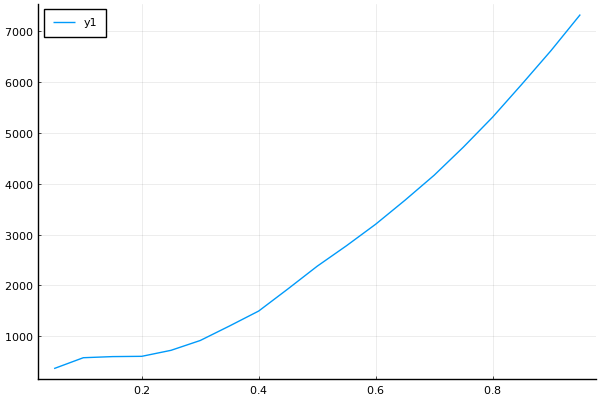

In [145]:
Quantile_Range = []

for i = 1:19
    j = 0.05*i
    push!(Quantile_Range,j)
end
Quantile_Range
plot(Quantile_Range, eFGPercentage)

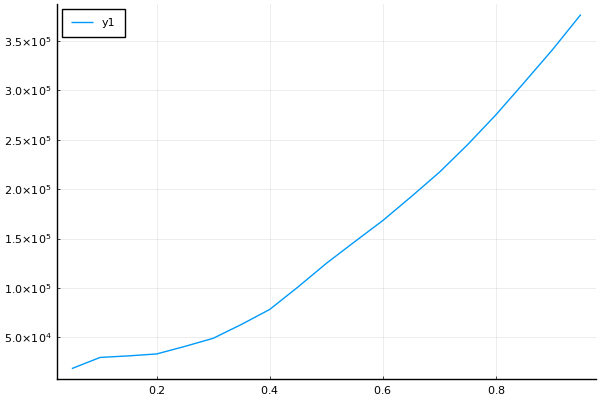

In [146]:
Quantile_Range = []

for i = 1:19
    j = 0.05*i
    push!(Quantile_Range,j)
end
Quantile_Range
plot(Quantile_Range, Age)

As the quantile increases, all features (Points, Rebounds, Assists, Blocks Per Game (BLK), Minutes per Game (MP), Effective Field Goal Percentage (eFGPercentage), and Age) have more of an effect on player's guaranteed salary on average.